# AB Tests

## Оценка результатов AB теста

В данном задании вам требуется оценить результаты AB теста. Даны результаты на контрольной и тестовой группе после проведения AB теста. Помимо показателей целевой переменной, вам даны также несколько фичей, которые являются характеристиками объектов. Даны целевые показатели (y) и принадлежность к целевой группе (W).

**Задача:**


*   Проверьте подходящую для данных гипотезу о равенстве средних в выборках
*   Каков treatment effect нашего воздействия? (ATE)
*   Примените известные вам методы оценки ATE с учетом особенностей данных.
*   Проанализируйте, сравните результаты применения различных методов.
*   В явном виде выпишите выводы.

Примечание: предположения о рандомизированном эксперименте нуждаются в проверке - независимость treatment от объектов не гарантирована. Все предположения выписывайте явно.

Для данной задачи используется dataset: dataset_part1_students.csv

In [1]:
import pandas as pd
from scipy import stats

In [2]:
#!wget https://raw.githubusercontent.com/Astrowa/technopark/main/A_B_tests/dataset_part1_students.csv

--2020-12-10 11:15:03--  https://raw.githubusercontent.com/Astrowa/technopark/main/A_B_tests/dataset_part1_students.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4310722 (4.1M) [text/plain]
Saving to: ‘dataset_part1_students.csv.1’

dataset_part1_stude 100%[===================>]   4.11M  22.8MB/s    in 0.2s    

2020-12-10 11:15:04 (22.8 MB/s) - ‘dataset_part1_students.csv.1’ saved [4310722/4310722]



In [3]:
data = pd.read_csv('dataset_part1_students.csv')

In [4]:
data

y\tW\tX_1\tX_2\tX_3\tX_4\tX_5\tX_6\tX_7\tX_8\tX_9\tX_10
0      -1.4594043737953961\t0.0\t0.9862768288615988\t...     
1      -1.6941738849759953\t0.0\t0.14088724485241533\...     
2      5.378373641535715\t0.0\t0.9532138731707349\t0....     
3      2.1881888161595326\t1.0\t0.1697024384024194\t0...     
4      2.8626964463356206\t1.0\t0.4423725818484675\t0...     
...                                                  ...     
19995  1.0676888764384533\t1.0\t0.6792037030060585\t0...     
19996  6.044203358475057\t1.0\t0.4241293112126302\t0....     
19997  2.569386413280728\t0.0\t0.05875440609268123\t0...     
19998  0.9641838435917882\t1.0\t0.6396630569636418\t0...     
19999  -1.4333859648051963\t0.0\t0.13517287147925194\...     

[20000 rows x 1 columns]

In [5]:
data_split = data['y\tW\tX_1\tX_2\tX_3\tX_4\tX_5\tX_6\tX_7\tX_8\tX_9\tX_10'].str.split(expand=True)

In [6]:
data_split

0    1   ...                   10                    11
0      -1.4594043737953961  0.0  ...   0.8621589354598529    0.1566996700094886
1      -1.6941738849759953  0.0  ...  0.12417877772572972   0.31973648445352787
2        5.378373641535715  0.0  ...  0.15585136278205936   0.47604896649886996
3       2.1881888161595326  1.0  ...  0.17779262018968056    0.8492480168178629
4       2.8626964463356206  1.0  ...  0.19192871335211525   0.42565598265327986
...                    ...  ...  ...                  ...                   ...
19995   1.0676888764384533  1.0  ...   0.4603241108114742      0.92079248923126
19996    6.044203358475057  1.0  ...   0.6963419311668535    0.5856810283320787
19997    2.569386413280728  0.0  ...   0.3499117984411346    0.8060848880595312
19998   0.9641838435917882  1.0  ...   0.7829370729555282  0.005246316431556486
19999  -1.4333859648051963  0.0  ...   0.6723889630675688    0.1168444075937689

[20000 rows x 12 columns]

In [7]:
k = 'y\tW\tX_1\tX_2\tX_3\tX_4\tX_5\tX_6\tX_7\tX_8\tX_9\tX_10'

In [8]:
kk = k.split()

In [9]:
for i in range(len(kk)):
    data_split.rename(columns={i: str(kk[i])}, inplace=True)

In [10]:
data_split

y    W  ...                  X_9                  X_10
0      -1.4594043737953961  0.0  ...   0.8621589354598529    0.1566996700094886
1      -1.6941738849759953  0.0  ...  0.12417877772572972   0.31973648445352787
2        5.378373641535715  0.0  ...  0.15585136278205936   0.47604896649886996
3       2.1881888161595326  1.0  ...  0.17779262018968056    0.8492480168178629
4       2.8626964463356206  1.0  ...  0.19192871335211525   0.42565598265327986
...                    ...  ...  ...                  ...                   ...
19995   1.0676888764384533  1.0  ...   0.4603241108114742      0.92079248923126
19996    6.044203358475057  1.0  ...   0.6963419311668535    0.5856810283320787
19997    2.569386413280728  0.0  ...   0.3499117984411346    0.8060848880595312
19998   0.9641838435917882  1.0  ...   0.7829370729555282  0.005246316431556486
19999  -1.4333859648051963  0.0  ...   0.6723889630675688    0.1168444075937689

[20000 rows x 12 columns]

Проверьте подходящую для данных гипотезу о равенстве средних в выборках

In [11]:
!pip install expan

In [12]:
import expan
import numpy as np

ExpAn core init: v1.4.0


In [13]:
data_split['y'][0]

'-1.4594043737953961'

In [14]:
data = data_split.astype('float')

In [15]:
data.dtypes

y       float64
W       float64
X_1     float64
X_2     float64
X_3     float64
X_4     float64
X_5     float64
X_6     float64
X_7     float64
X_8     float64
X_9     float64
X_10    float64
dtype: object

In [16]:
A = data[data['W'] == 1]

In [17]:
A

y    W       X_1  ...       X_8       X_9      X_10
3      2.188189  1.0  0.169702  ...  0.668350  0.177793  0.849248
4      2.862696  1.0  0.442373  ...  0.555696  0.191929  0.425656
5      3.051907  1.0  0.513420  ...  0.936032  0.803028  0.697305
6      3.094696  1.0  0.461384  ...  0.831532  0.737843  0.898497
7      0.530055  1.0  0.230734  ...  0.816207  0.077862  0.134613
...         ...  ...       ...  ...       ...       ...       ...
19989  4.171173  1.0  0.824450  ...  0.889266  0.230869  0.291529
19992  3.715902  1.0  0.427696  ...  0.465376  0.319514  0.590445
19995  1.067689  1.0  0.679204  ...  0.735293  0.460324  0.920792
19996  6.044203  1.0  0.424129  ...  0.691192  0.696342  0.585681
19998  0.964184  1.0  0.639663  ...  0.331296  0.782937  0.005246

[10446 rows x 12 columns]

In [18]:
B = data[data['W'] == 0]

In [19]:
B

y    W       X_1  ...       X_8       X_9      X_10
0     -1.459404  0.0  0.986277  ...  0.343316  0.862159  0.156700
1     -1.694174  0.0  0.140887  ...  0.561427  0.124179  0.319736
2      5.378374  0.0  0.953214  ...  0.456119  0.155851  0.476049
8      7.043034  0.0  0.576548  ...  0.902407  0.449204  0.618182
11    -0.507666  0.0  0.040952  ...  0.609019  0.452414  0.296660
...         ...  ...       ...  ...       ...       ...       ...
19991  6.407034  0.0  0.484067  ...  0.882517  0.190428  0.455095
19993  3.801762  0.0  0.259079  ...  0.060060  0.725533  0.976032
19994  2.865866  0.0  0.300226  ...  0.873042  0.195085  0.406572
19997  2.569386  0.0  0.058754  ...  0.440243  0.349912  0.806085
19999 -1.433386  0.0  0.135173  ...  0.982209  0.672389  0.116844

[9554 rows x 12 columns]

In [20]:
A.iloc[:,0]

3        2.188189
4        2.862696
5        3.051907
6        3.094696
7        0.530055
           ...   
19989    4.171173
19992    3.715902
19995    1.067689
19996    6.044203
19998    0.964184
Name: y, Length: 10446, dtype: float64

In [21]:
stats.ttest_ind(A.iloc[:,0], B.iloc[:,0])#гипотеза отвергается

Ttest_indResult(statistic=9.332400850259313, pvalue=1.1400916649505329e-20)

### Каков treatment effect нашего воздействия? (ATE)

In [22]:
y = A.iloc[:,0]
y1 = B.iloc[:,0]

In [23]:
treatment_effect = y.mean() - y1.mean()
treatment_effect

0.4001031055444413

In [24]:
delta_err  = 1.96 * np.sqrt(
        y.var() / y.shape[0] + 
        y1.var() / y1.shape[0])

In [25]:
delta_err

0.08402817848102015

### Примените известные вам методы оценки ATE с учетом особенностей данных.

In [26]:
!pip install econml

In [27]:
import econml

In [28]:
y.shape

(10446,)

In [29]:
y1.shape

(9554,)

In [30]:
y_ = np.array(y)

In [31]:
y_1 = np.array(y1)

In [32]:
k2,p = stats.normaltest(data)

In [33]:
p[0]#отклонение от нормалного распределения

0.5952637697871511

In [34]:
econml

<module 'econml' (namespace)>

In [35]:
!pip install causalml

In [36]:
from causalml.inference import meta

In [37]:
X = data.iloc[:,2:]

In [38]:
X

X_1       X_2       X_3  ...       X_8       X_9      X_10
0      0.986277  0.873392  0.509746  ...  0.343316  0.862159  0.156700
1      0.140887  0.757080  0.736325  ...  0.561427  0.124179  0.319736
2      0.953214  0.137357  0.569413  ...  0.456119  0.155851  0.476049
3      0.169702  0.896258  0.373394  ...  0.668350  0.177793  0.849248
4      0.442373  0.831468  0.763921  ...  0.555696  0.191929  0.425656
...         ...       ...       ...  ...       ...       ...       ...
19995  0.679204  0.648429  0.230049  ...  0.735293  0.460324  0.920792
19996  0.424129  0.138698  0.729584  ...  0.691192  0.696342  0.585681
19997  0.058754  0.932489  0.537246  ...  0.440243  0.349912  0.806085
19998  0.639663  0.291877  0.111292  ...  0.331296  0.782937  0.005246
19999  0.135173  0.766632  0.577771  ...  0.982209  0.672389  0.116844

[20000 rows x 10 columns]

In [39]:
ATE_tre = meta.BaseRLearner(X, data['W'], data['y'])

In [40]:
ATE_tre.estimate_ate

<bound method BaseRLearner.estimate_ate of BaseRLearner(model_mu=0        0.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
19995    1.0
19996    1.0
19997    0.0
19998    1.0
19999    0.0
Name: W, Length: 20000, dtype: float64,
	model_tau=0       -1.459404
1       -1.694174
2        5.378374
3        2.188189
4        2.862696
           ...   
19995    1.067689
19996    6.044203
19997    2.569386
19998    0.964184
19999   -1.433386
Name: y, Length: 20000, dtype: float64)>

In [41]:
!pip install CausalInference

In [42]:
from causalinference import CausalModel

In [43]:
data['y'].values

array([-1.45940437, -1.69417388,  5.37837364, ...,  2.56938641,
        0.96418384, -1.43338596])

In [44]:
X.values

array([[0.98627683, 0.87339195, 0.50974552, ..., 0.34331559, 0.86215894,
        0.15669967],
       [0.14088724, 0.75708028, 0.73632492, ..., 0.56142698, 0.12417878,
        0.31973648],
       [0.95321387, 0.13735679, 0.5694131 , ..., 0.45611937, 0.15585136,
        0.47604897],
       ...,
       [0.05875441, 0.93248915, 0.53724573, ..., 0.44024325, 0.3499118 ,
        0.80608489],
       [0.63966306, 0.29187749, 0.11129211, ..., 0.33129636, 0.78293707,
        0.00524632],
       [0.13517287, 0.76663239, 0.57777096, ..., 0.98220922, 0.67238896,
        0.11684441]])

In [45]:
cm = CausalModel(
    Y=data['y'].values, 
    D=data['W'].values, 
    X=X.values)

cm.est_via_ols(adj=1)

OLS = cm.estimates

print(cm.estimates)#линейная регрессия


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610



In [46]:
cm = CausalModel(
    Y=data['y'].values, 
    D=data['W'].values,
    X=X.values)

cm.est_via_matching()

Matching = cm.estimates

print(cm.estimates)#оценка соответствия


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.478      0.076      6.266      0.000      0.329      0.628
           ATC      0.388      0.090      4.330      0.000      0.212      0.563
           ATT      0.561      0.090      6.247      0.000      0.385      0.737



In [47]:
cm = CausalModel(
    Y=data['y'].values, 
    D=data['W'].values,
    X=X.values)

cm.est_propensity_s()
cm.trim_s()
cm.est_via_matching()

Matching_PS = cm.estimates

print(cm.estimates)#


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.499      0.079      6.302      0.000      0.344      0.654
           ATC      0.408      0.090      4.516      0.000      0.231      0.585
           ATT      0.568      0.092      6.160      0.000      0.387      0.749



In [48]:
cm = CausalModel(
    Y=data['y'].values, 
    D=data['W'].values, 
    X=X.values)

cm.est_propensity_s()
cm.stratify_s()
cm.est_via_blocking()

Blocking = cm.estimates

print(cm.estimates)


Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.515      0.056      9.264      0.000      0.406      0.624
           ATC      0.412      0.066      6.215      0.000      0.282      0.542
           ATT      0.609      0.066      9.195      0.000      0.479      0.739



### Проанализируйте, сравните результаты применения различных методов.

In [49]:
print(OLS)
print(Matching)
print(Matching_PS)
print(Blocking)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.478      0.076      6.266      0.000      0.329      0.628
           ATC      0.388      0.090      4.330      0.000      0.212      0.563
           ATT      0.561      0.090      6.247      0.000      0.385      0.737


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.499      0.079      6.302      0.000      0.344      0

In [50]:
Blocking['blocking']

{'ate': 0.5149968969402041, 'atc': 0.41181441017281, 'att': 0.6093684725266184, 'ate_se': 0.0555917594188193, 'atc_se': 0.06626320367068532, 'att_se': 0.06627005458887239}

In [51]:
ate_dict = dict()

In [52]:
ate_dict['ols'] = OLS['ols']
ate_dict['Matching'] = Matching['matching']
ate_dict['Matching_PS'] = Matching_PS['matching']
ate_dict['Blocking'] = Blocking['blocking']

In [53]:
ate_dict

{'Blocking': {'ate': 0.5149968969402041, 'atc': 0.41181441017281, 'att': 0.6093684725266184, 'ate_se': 0.0555917594188193, 'atc_se': 0.06626320367068532, 'att_se': 0.06627005458887239},
 'Matching': {'atc': 0.38758981008613497, 'att': 0.5612886151070108, 'ate': 0.47831269594853837, 'atc_se': 0.08950508297371353, 'att_se': 0.0898461996477695, 'ate_se': 0.07633625551671686},
 'Matching_PS': {'atc': 0.4081227442634577, 'att': 0.5680991047859002, 'ate': 0.4988233893103572, 'atc_se': 0.09036755539838244, 'att_se': 0.09222740312181704, 'ate_se': 0.0791586138095112},
 'ols': {'ate': 0.5133854882565592, 'ate_se': 0.04909209988428042}}

In [54]:
import matplotlib.pyplot as plt

In [55]:
for method, result in ate_dict.items():
    print(method)
    print(result)

ols

Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610

Matching

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.478      0.076      6.266      0.000      0.329      0.628
           ATC      0.388      0.090      4.330      0.000      0.212      0.563
           ATT      0.561      0.090      6.247      0.000      0.385      0.737

Matching_PS

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.499      0.079      6.302    

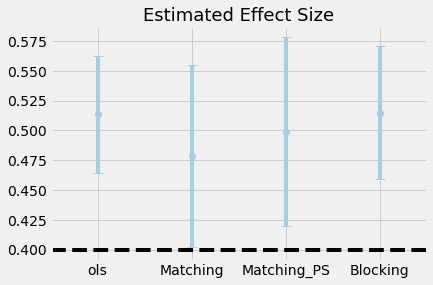

In [56]:
y = []
yerr = []
x_label = []

for method, result in ate_dict.items():
    y.append(result["ate"])
    yerr.append(result["ate_se"])
    x_label.append(method)
    
x = np.arange(len(y))

plt.errorbar(x=x, y=y, yerr=yerr, linestyle="none", capsize=5, marker="o")
plt.xticks(x, x_label)
plt.title("Estimated Effect Size", fontsize=18)
plt.hlines(treatment_effect, -0.5, 3.5, linestyles="dashed")
plt.xlim(-0.5, 3.5);

### В явном виде выпишите выводы.

In [57]:
treatment_effect

0.4001031055444413

In [58]:
ate_dict

{'Blocking': {'ate': 0.5149968969402041, 'atc': 0.41181441017281, 'att': 0.6093684725266184, 'ate_se': 0.0555917594188193, 'atc_se': 0.06626320367068532, 'att_se': 0.06627005458887239},
 'Matching': {'atc': 0.38758981008613497, 'att': 0.5612886151070108, 'ate': 0.47831269594853837, 'atc_se': 0.08950508297371353, 'att_se': 0.0898461996477695, 'ate_se': 0.07633625551671686},
 'Matching_PS': {'atc': 0.4081227442634577, 'att': 0.5680991047859002, 'ate': 0.4988233893103572, 'atc_se': 0.09036755539838244, 'att_se': 0.09222740312181704, 'ate_se': 0.0791586138095112},
 'ols': {'ate': 0.5133854882565592, 'ate_se': 0.04909209988428042}}

In [59]:
ate_dict['Blocking']['ate']#не попадает в диапазон

0.5149968969402041

In [60]:
ate_dict['Matching']['ate']

0.47831269594853837

In [61]:
ate_dict['Matching_PS']['ate']

0.4988233893103572

In [62]:
ate_dict['ols']['ate']#не попадает в диапазон

0.5133854882565592

In [63]:
print(treatment_effect - ate_dict['Blocking']['ate'])
print(treatment_effect - ate_dict['Matching']['ate'])#наименьшее отклонение
print(treatment_effect - ate_dict['Matching_PS']['ate'])
print(treatment_effect - ate_dict['ols']['ate'])

-0.11489379139576283
-0.07820959040409708
-0.0987202837659159
-0.11328238271211788


Контрольная версия B выигрывает

## Оценка результатов AB теста с показателями до начала эксперимента

Необходимо как и ранее оценить результаты AB теста, а именно ATE. Вы располагаете результатами до и после проведения теста (y_0 и y_1), а также вам дан treatment assignment (W).

Необходимо:

*   Проверить все требуемые гипотезы
*   Оценить ATE подходящим для этого случая методом (примените несколько методов)
*   Сравнить и проанализировать результаты оценок
*   Явно выписать выводы.

Как и прежде, все предположения должны быть указаны. Визуализация результатов приветствуется.

dataset_part2_students.csv

### Проверить все требуемые гипотезы

In [64]:
#!wget https://raw.githubusercontent.com/Astrowa/technopark/main/A_B_tests/dataset_part2_students.csv

--2020-12-10 11:16:04--  https://raw.githubusercontent.com/Astrowa/technopark/main/A_B_tests/dataset_part2_students.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2346453 (2.2M) [text/plain]
Saving to: ‘dataset_part2_students.csv.1’

dataset_part2_stude 100%[===================>]   2.24M  --.-KB/s    in 0.1s    

2020-12-10 11:16:05 (19.0 MB/s) - ‘dataset_part2_students.csv.1’ saved [2346453/2346453]



In [65]:
data2 = pd.read_csv('dataset_part2_students.csv', sep = '\t')

In [66]:
data2

y_1       y_0    W       X_1  ...       X_7       X_8       X_9      X_10
0     5.887156  2.785060  1.0  0.605978  ...  0.178993  0.752925  0.662161  0.784310
1     2.232601  5.533515  0.0  0.096894  ...  0.616525  0.963843  0.574304  0.371161
2     0.144419  0.095546  1.0  0.452145  ...  0.517814  0.823099  0.732225  0.069056
3    -2.446425  3.590472  1.0  0.672129  ...  0.301069  0.871741  0.589654  0.981770
4     2.163090  1.365405  0.0  0.442232  ...  0.890655  0.588886  0.636830  0.342209
...        ...       ...  ...       ...  ...       ...       ...       ...       ...
9995  3.323575  1.207956  1.0  0.280489  ...  0.401038  0.825225  0.631631  0.824960
9996  4.133119  1.636214  1.0  0.352855  ...  0.639069  0.339857  0.762911  0.406340
9997  3.124242 -1.984834  0.0  0.079105  ...  0.562383  0.727493  0.043481  0.895637
9998  1.366205  0.777716  1.0  0.319164  ...  0.235775  0.417768  0.728639  0.197892
9999  1.412117 -3.467385  1.0  0.139164  ...  0.052427  0.096104  0.946921  0.427957

[10000 rows x 13 columns]

In [67]:
Y = data2['y_1'] - data2['y_0']

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [68]:
data2.columns.values

array(['y_1', 'y_0', 'W', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10'], dtype=object)

In [69]:
kk.sort

<function list.sort>

In [70]:
data2['Y'] = Y

In [71]:
data2

y_1       y_0    W       X_1  ...       X_8       X_9      X_10         Y
0     5.887156  2.785060  1.0  0.605978  ...  0.752925  0.662161  0.784310  3.102097
1     2.232601  5.533515  0.0  0.096894  ...  0.963843  0.574304  0.371161 -3.300914
2     0.144419  0.095546  1.0  0.452145  ...  0.823099  0.732225  0.069056  0.048874
3    -2.446425  3.590472  1.0  0.672129  ...  0.871741  0.589654  0.981770 -6.036897
4     2.163090  1.365405  0.0  0.442232  ...  0.588886  0.636830  0.342209  0.797684
...        ...       ...  ...       ...  ...       ...       ...       ...       ...
9995  3.323575  1.207956  1.0  0.280489  ...  0.825225  0.631631  0.824960  2.115619
9996  4.133119  1.636214  1.0  0.352855  ...  0.339857  0.762911  0.406340  2.496904
9997  3.124242 -1.984834  0.0  0.079105  ...  0.727493  0.043481  0.895637  5.109076
9998  1.366205  0.777716  1.0  0.319164  ...  0.417768  0.728639  0.197892  0.588489
9999  1.412117 -3.467385  1.0  0.139164  ...  0.096104  0.946921  0.427957  4.879502

[10000 rows x 14 columns]

In [72]:
k2,p = stats.normaltest(data2)

In [73]:
p[0]#гипотеза принимается

0.3192826657450293

In [74]:
A1 = data2[data2['W'] == 1]#x
B1 = data2[data2['W'] == 0]#y

In [75]:
A1

y_1       y_0    W       X_1  ...       X_8       X_9      X_10         Y
0     5.887156  2.785060  1.0  0.605978  ...  0.752925  0.662161  0.784310  3.102097
2     0.144419  0.095546  1.0  0.452145  ...  0.823099  0.732225  0.069056  0.048874
3    -2.446425  3.590472  1.0  0.672129  ...  0.871741  0.589654  0.981770 -6.036897
8     3.592016  3.985938  1.0  0.372296  ...  0.966714  0.825899  0.305400 -0.393922
9     0.033735  2.688234  1.0  0.823278  ...  0.343327  0.622637  0.464600 -2.654499
...        ...       ...  ...       ...  ...       ...       ...       ...       ...
9994 -2.297989 -0.615888  1.0  0.490971  ...  0.334592  0.787406  0.754955 -1.682101
9995  3.323575  1.207956  1.0  0.280489  ...  0.825225  0.631631  0.824960  2.115619
9996  4.133119  1.636214  1.0  0.352855  ...  0.339857  0.762911  0.406340  2.496904
9998  1.366205  0.777716  1.0  0.319164  ...  0.417768  0.728639  0.197892  0.588489
9999  1.412117 -3.467385  1.0  0.139164  ...  0.096104  0.946921  0.427957  4.879502

[5240 rows x 14 columns]

In [76]:
y_A1 = A1.iloc[:,13]
y_B0 = B1.iloc[:,13]

In [77]:
treatment_effect_2 = y_A1.mean() - y_B0.mean()
treatment_effect_2

0.5549047702971162

In [78]:
stats.fligner(y_A1, y_B0)#равны ли дисперсии? гипотеза принимается

FlignerResult(statistic=0.0003912182699424198, pvalue=0.9842194800359902)

In [79]:
stats.ttest_ind(y_A1, y_B0)#гипотеза о равентсве отвергается

Ttest_indResult(statistic=9.118025905018952, pvalue=9.12276266827303e-20)

In [80]:
stats.shapiro(data2)#гипотеза отвергается(+ N > 5000)

p-value may not be accurate for N > 5000.


(0.7302572727203369, 0.0)

In [81]:
stats.mannwhitneyu(y_A1, y_B0)#гипотеза отвергается, так как отклонение от нормальности не существенно

MannwhitneyuResult(statistic=11245141.0, pvalue=9.177359384779589e-18)

### Оценить ATE подходящим для этого случая методом (примените несколько методов)

In [82]:
X2 = data2.iloc[:,3:13]

In [83]:
X2.dtypes

X_1     float64
X_2     float64
X_3     float64
X_4     float64
X_5     float64
X_6     float64
X_7     float64
X_8     float64
X_9     float64
X_10    float64
dtype: object

In [84]:
X2.values

array([[0.60597828, 0.73336936, 0.13894716, ..., 0.75292543, 0.66216051,
        0.78431013],
       [0.0968944 , 0.05857129, 0.96239599, ..., 0.96384302, 0.57430429,
        0.37116085],
       [0.45214524, 0.20185025, 0.56930512, ..., 0.82309863, 0.73222503,
        0.06905627],
       ...,
       [0.07910474, 0.771808  , 0.40902108, ..., 0.72749286, 0.04348118,
        0.8956372 ],
       [0.31916361, 0.71571062, 0.29304841, ..., 0.41776781, 0.728639  ,
        0.19789191],
       [0.13916385, 0.67953731, 0.39334604, ..., 0.09610438, 0.94692056,
        0.42795668]])

In [85]:
cmd = CausalModel(
    Y=data2['Y'].values, 
    D=data2['W'].values, 
    X=X2.values)

cmd.est_via_ols(adj=1)

OLS = cm.estimates

print(cmd.estimates)#линейная регрессия


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.543      0.070      7.773      0.000      0.406      0.679



In [86]:
cmd = CausalModel(
    Y=data2['Y'].values, 
    D=data2['W'].values, 
    X=X2.values)

cmd.est_via_matching()

Matching = cmd.estimates

print(cmd.estimates)#оценка соответствия


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.570      0.109      5.225      0.000      0.356      0.784
           ATC      0.484      0.128      3.798      0.000      0.234      0.734
           ATT      0.649      0.128      5.065      0.000      0.398      0.900



In [87]:
cmd = CausalModel(
    Y=data2['Y'].values, 
    D=data2['W'].values, 
    X=X2.values)

cmd.est_propensity_s()
cmd.trim_s()
cmd.est_via_matching()

Matching_PS = cmd.estimates

print(cmd.estimates)#


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.621      0.114      5.469      0.000      0.398      0.844
           ATC      0.563      0.130      4.318      0.000      0.308      0.819
           ATT      0.664      0.131      5.064      0.000      0.407      0.922



In [88]:
cmd = CausalModel(
    Y=data2['Y'].values, 
    D=data2['W'].values, 
    X=X2.values)

cmd.est_propensity_s()
cmd.stratify_s()
cmd.est_via_blocking()

Blocking = cmd.estimates

print(cmd.estimates)


Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.530      0.078      6.756      0.000      0.376      0.684
           ATC      0.437      0.096      4.547      0.000      0.249      0.626
           ATT      0.614      0.091      6.779      0.000      0.436      0.791



### Сравнить и проанализировать результаты оценок

In [89]:
treatment_effect_2#попадает в диапазоны всех методов

0.5549047702971162

In [90]:
OLS['blocking']['ate']

0.5149968969402041

In [91]:
Matching['matching']['ate']

0.5704647920177232

In [92]:
Matching_PS['matching']['ate']

0.6211003747951169

In [93]:
Blocking['blocking']['ate']

0.5299575154042303

In [94]:
print(treatment_effect_2 - OLS['blocking']['ate'])
print(treatment_effect_2 - Matching['matching']['ate'])#наименьшее отклонение
print(treatment_effect_2 - Matching_PS['matching']['ate'])
print(treatment_effect_2 - Blocking['blocking']['ate'])

0.03990787335691204
-0.015560021720606998
-0.06619560449800077
0.02494725489288585


### Явно выписать выводы.

In [94]:
Версия B выигрывает

## 3. Построение uplift модели по результатам AB теста.

Вам даны результаты AB теста для модели конверсии клиента в продукте (conversion). Конверсия может принимать значения 1 или 0, что значит - клиент подключил услугу, либо не подключил соответственно.

Задача:


*   Оцените ATE по данным.
*   Оцените CATE для каждого наблюдения.
*   Проставьте рекомендации к воздействию на каждый объект.
*   Какая ожидаемая конверсия при оптимальном воздействии?
*   Все выводы, предпосылки и методы представляйте в явном виде в ноутбуке.

Визуализация результатов также будет приветствоваться.

dataset_part3_students.csv

In [95]:
data3 = pd.read_csv('dataset_part3_students.csv', sep = '\t')

In [96]:
data3

treatment       X_1       X_2  ...      X_21      X_22  conversion
0         control  0.034351  0.550725  ...  1.929914  0.798664           0
1         control -1.059404  0.299404  ...  0.188000 -1.134651           0
2         control  0.051934  2.338729  ... -0.888490 -1.402561           0
3       treatment  0.667770  0.539316  ... -0.390745 -1.578004           1
4         control -1.416158  2.486628  ...  0.972459 -0.711251           0
...           ...       ...       ...  ...       ...       ...         ...
199995    control -1.309691  2.925832  ...  1.265746  0.059865           0
199996    control -1.131361  1.562317  ... -1.943045 -0.145377           0
199997    control  0.442433  2.202153  ... -1.081292  0.995816           0
199998  treatment -0.084879  0.423688  ...  0.436962  0.622010           0
199999    control  0.105915 -0.602186  ...  0.136364  1.724350           0

[200000 rows x 24 columns]

In [97]:
features3 = data3.columns[1:23]

In [98]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from xgboost import XGBRegressor
from causalml.dataset import synthetic_data
from sklearn.linear_model import LinearRegression

In [99]:
data3.iloc[:,1:23].values

array([[ 0.03435101,  0.55072544, -1.3485244 , ...,  0.22796248,
         1.92991421,  0.79866358],
       [-1.05940449,  0.29940413,  0.22027314, ..., -2.06489292,
         0.18799973, -1.13465104],
       [ 0.05193427,  2.33872924, -0.34101688, ..., -3.18219625,
        -0.88848958, -1.40256108],
       ...,
       [ 0.44243308,  2.20215276, -0.38001884, ...,  1.62052923,
        -1.08129158,  0.99581604],
       [-0.08487895,  0.42368799,  0.38993125, ...,  1.6563432 ,
         0.43696242,  0.62200993],
       [ 0.10591522, -0.60218613, -1.35810238, ...,  2.08726234,
         0.13636357,  1.72435007]])

In [100]:
data3['treatment'].values

array(['control', 'control', 'control', ..., 'control', 'treatment',
       'control'], dtype=object)

### Оцените ATE по данным

S-Learner using LinearRegression

In [101]:
learner_s = LRSRegressor(control_name='control')
ate_s = learner_s.estimate_ate(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

(array([0.06024252]), array([0.05763117]), array([0.06285388]))
ATE estimate: 0.060
ATE lower bound: 0.058
ATE upper bound: 0.063


In [102]:
learner_s = LRSRegressor(control_name='treatment')
ate_s = learner_s.estimate_ate(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

(array([-0.06024252]), array([-0.06285388]), array([-0.05763117]))
ATE estimate: -0.060
ATE lower bound: -0.063
ATE upper bound: -0.058


T-Learner using XGB

In [103]:
# Calling the Base Learner class and feeding in LinearRegression
learner_t = BaseTRegressor(learner=LinearRegression(), control_name='control')
ate_t = learner_t.estimate_ate(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)
print('\nUsing the BaseTRegressor class and using Linear Regression (different result):')
print(ate_t)

INFO:causalml:Error metrics for group treatment
INFO:causalml:    RMSE   (Control):     0.2640
INFO:causalml:    RMSE (Treatment):     0.2804
INFO:causalml:   sMAPE   (Control):     1.8570
INFO:causalml:   sMAPE (Treatment):     1.7528
INFO:causalml:    Gini   (Control):     0.8371
INFO:causalml:    Gini (Treatment):     0.8874



Using the BaseTRegressor class and using Linear Regression (different result):
(array([0.06011828]), array([0.05750591]), array([0.06273066]))


X Learner without propensity score input

In [104]:
# Calling the Base Learner class and feeding in XGB
learner_x = BaseXRegressor(XGBRegressor(), control_name='control')
ate_x = learner_x.estimate_ate(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)
print('Using the BaseXRegressor class and using XGB without propensity score input:')
print(ate_x)

# Calling the Base Learner class and feeding in LinearRegression
learner_x = BaseXRegressor(learner=LinearRegression(), control_name='control')
ate_x = learner_x.estimate_ate(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)
print('\nUsing the BaseXRegressor class and using Linear Regression without propensity score input:')
print(ate_x)

INFO:causalml:Generating propensity score
INFO:causalml:Calibrating propensity scores.


[11:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group treatment
INFO:causalml:    RMSE   (Control):     0.1928
INFO:causalml:    RMSE (Treatment):     0.2173
INFO:causalml:   sMAPE   (Control):     1.8228
INFO:causalml:   sMAPE (Treatment):     1.7229
INFO:causalml:    Gini   (Control):     0.9309
INFO:causalml:    Gini (Treatment):     0.9378


Using the BaseXRegressor class and using XGB without propensity score input:
(array([0.05979829]), array([0.05766678]), array([0.06192979]))


INFO:causalml:Generating propensity score
INFO:causalml:Calibrating propensity scores.
INFO:causalml:Error metrics for group treatment
INFO:causalml:    RMSE   (Control):     0.2640
INFO:causalml:    RMSE (Treatment):     0.2804
INFO:causalml:   sMAPE   (Control):     1.8570
INFO:causalml:   sMAPE (Treatment):     1.7528
INFO:causalml:    Gini   (Control):     0.8371
INFO:causalml:    Gini (Treatment):     0.8874



Using the BaseXRegressor class and using Linear Regression without propensity score input:
(array([0.06011804]), array([0.05750566]), array([0.06273041]))


R Learner without propensity score input

In [105]:
# Calling the Base Learner class and feeding in LinearRegression
learner_r = BaseRRegressor(learner=LinearRegression(), control_name='control')
ate_r = learner_r.estimate_ate(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)
print('Using the BaseRRegressor class and using Linear Regression without propensity score input:')
print(ate_r)

INFO:causalml:Generating propensity score
INFO:causalml:Calibrating propensity scores.
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for treatment with R-loss


Using the BaseRRegressor class and using Linear Regression without propensity score input:
(array([0.06032437]), array([0.06031806]), array([0.06033067]))


In [106]:
print('ATE estimate: {:.03f}'.format(ate_r[0][0]))

ATE estimate: 0.060


### CATE

In [107]:
# S Learner
learner_s = LRSRegressor(control_name='treatment')
cate_s = learner_s.fit_predict(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)

INFO:causalml:Error metrics for group control
INFO:causalml:    RMSE   (Control):     0.3056
INFO:causalml:    RMSE (Treatment):     0.2902
INFO:causalml:   sMAPE   (Control):     1.7842
INFO:causalml:   sMAPE (Treatment):     1.8707
INFO:causalml:    Gini   (Control):     0.8230
INFO:causalml:    Gini (Treatment):     0.7395


In [108]:
# S Learner
learner_s = LRSRegressor(control_name='control')
cate_s = learner_s.fit_predict(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)

INFO:causalml:Error metrics for group treatment
INFO:causalml:    RMSE   (Control):     0.2902
INFO:causalml:    RMSE (Treatment):     0.3056
INFO:causalml:   sMAPE   (Control):     1.8707
INFO:causalml:   sMAPE (Treatment):     1.7842
INFO:causalml:    Gini   (Control):     0.7395
INFO:causalml:    Gini (Treatment):     0.8230


In [109]:
# T Learner
learner_t = BaseTRegressor(learner=XGBRegressor(), control_name='control')
cate_t = learner_t.fit_predict(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)

[11:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group treatment
INFO:causalml:    RMSE   (Control):     0.1928
INFO:causalml:    RMSE (Treatment):     0.2173
INFO:causalml:   sMAPE   (Control):     1.8228
INFO:causalml:   sMAPE (Treatment):     1.7229
INFO:causalml:    Gini   (Control):     0.9309
INFO:causalml:    Gini (Treatment):     0.9378


In [110]:
# X Learner without propensity score input
learner_x_no_p = BaseXRegressor(learner=XGBRegressor(), control_name='control')
cate_x_no_p = learner_x_no_p.fit_predict(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)

INFO:causalml:Generating propensity score
INFO:causalml:Calibrating propensity scores.


[11:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:29:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:29:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group treatment
INFO:causalml:    RMSE   (Control):     0.1928
INFO:causalml:    RMSE (Treatment):     0.2173
INFO:causalml:   sMAPE   (Control):     1.8228
INFO:causalml:   sMAPE (Treatment):     1.7229
INFO:causalml:    Gini   (Control):     0.9309
INFO:causalml:    Gini (Treatment):     0.9378


In [111]:
# R Learner without propensity score input
learner_r_no_p = BaseRRegressor(learner=XGBRegressor(), control_name='control')
cate_r_no_p = learner_r_no_p.fit_predict(X = data3.iloc[:,1:23].values,
                               treatment=data3['treatment'].values, 
                               y=data3['conversion'].values)

INFO:causalml:Generating propensity score
INFO:causalml:Calibrating propensity scores.
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for treatment with R-loss


[11:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


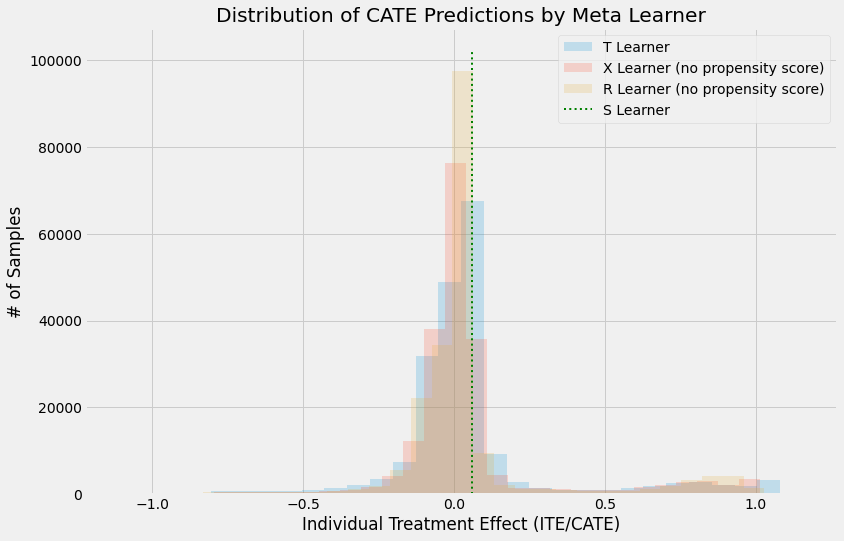

In [112]:
alpha=0.2
bins=30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner')
plt.hist(cate_x_no_p, alpha=alpha, bins=bins, label='X Learner (no propensity score)')
plt.hist(cate_r_no_p, alpha=alpha, bins=bins, label='R Learner (no propensity score)')
plt.vlines(cate_s[0], 0, plt.axes().get_ylim()[1], label='S Learner',
           linestyles='dotted', colors='green', linewidth=2)
plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

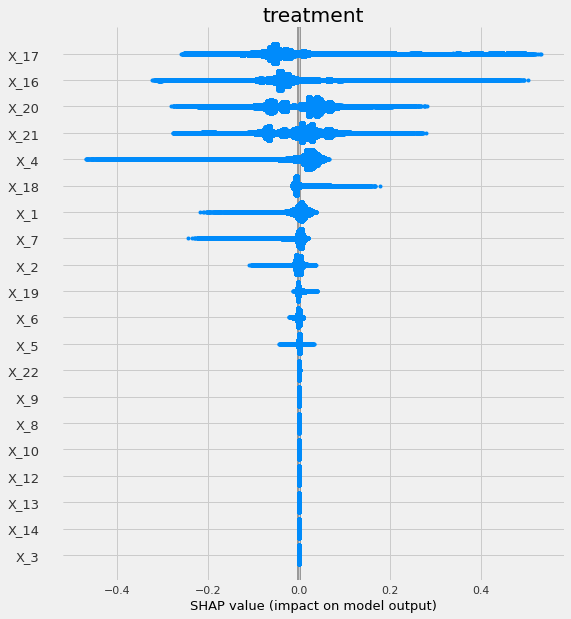

In [113]:
learner_r_no_p.plot_shap_values(X = data3.iloc[:,1:23].values,
                          features=features3,
                          tau = cate_r_no_p)

In [114]:
from IPython.display import Image
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

In [115]:
uplift_model = UpliftTreeClassifier(max_depth=7, min_samples_leaf=150, 
                                    min_samples_treatment=40,
                                    n_reg=100, 
                                    evaluationFunction='KL', 
                                    control_name='control')

In [116]:
%time
uplift_model.fit(data3.iloc[:,1:23].values,
                 treatment=data3['treatment'].values,
                 y=data3['conversion'].values)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


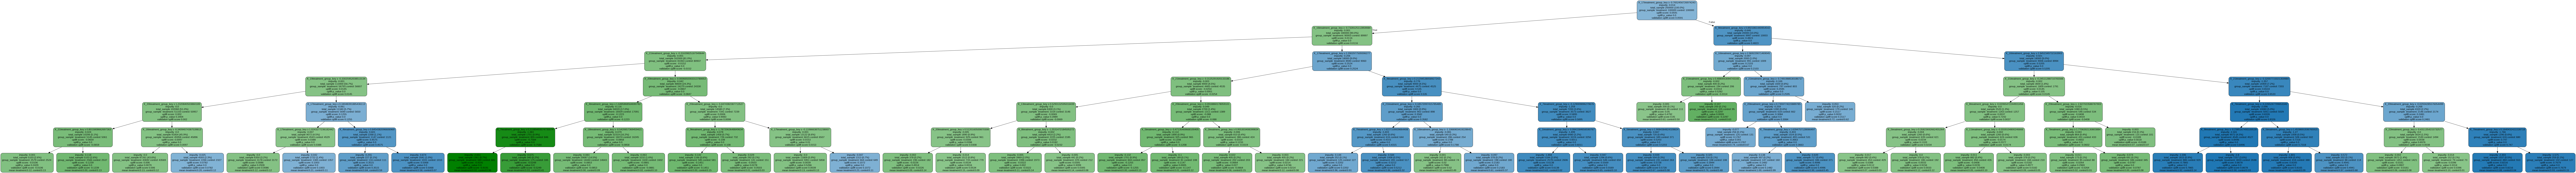

In [117]:
graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features3)
Image(graph.create_png())

In [118]:
uplift_model_RF = UpliftRandomForestClassifier(n_estimators=15, max_depth = 5, 
                                            min_samples_leaf = 150, 
                                            min_samples_treatment = 50, 
                                            n_reg = 100, 
                                            evaluationFunction='KL', 
                                            control_name='control')

In [119]:
%%time

uplift_model_RF.fit(data3.iloc[:,1:23].values,
                 treatment=data3['treatment'].values,
                 y=data3['conversion'].values)

CPU times: user 314 ms, sys: 99.3 ms, total: 413 ms
Wall time: 4min 17s


In [120]:
uplift_tree_RF = uplift_model_RF.uplift_forest[0]

result = uplift_tree_string(uplift_tree_RF.fitted_uplift_tree, features3)

X_17treatment_group_key >= -0.7617143330683804?
yes -> X_16treatment_group_key >= -0.7330055262784472?
		yes -> X_21treatment_group_key >= -0.7973975433747613?
				yes -> X_19treatment_group_key >= -0.3383184604502303?
						yes -> {'control': 0.125994, 'treatment': 0.116189}
						no  -> {'control': 0.111338, 'treatment': 0.222087}
				no  -> X_20treatment_group_key >= -0.18097527482409034?
						yes -> {'control': 0.1215, 'treatment': 0.004047}
						no  -> {'control': 0.120748, 'treatment': 0.118744}
		no  -> X_4treatment_group_key >= 0.19680814202186325?
				yes -> X_17treatment_group_key >= 2.3055669767779743?
						yes -> {'control': 0.360132, 'treatment': 0.268456}
						no  -> {'control': 0.425434, 'treatment': 0.739829}
				no  -> X_2treatment_group_key >= 0.2822254697252703?
						yes -> {'control': 0.039583, 'treatment': 0.337465}
						no  -> {'control': 0.087798, 'treatment': 0.352549}
no  -> X_9treatment_group_key >= 0.8671629863274141?
		yes -> X_18treatment_group_key >=

In [121]:
graph = uplift_tree_plot(uplift_tree_RF.fitted_uplift_tree, features3)
Image(graph.create_png())